In [1]:
from IPython.display import display, HTML, Image
from pathlib import Path
import requests
import json
import os

pp = lambda x: print(json.dumps(x, indent=2))

SKEMA_EQ2MML_SERVICE = os.environ.get("SKEMA_EQMML_ADDRESS", "http://eq2mml:8001")
SKEMA_PA_SERVICE = os.environ.get("SKEMA_PA_ADDRESS", "http://skema-py:8000")
SKEMA_RS_SERVICE = os.environ.get("SKEMA_RS_ADDRESS", "http://skema-rs:8080")

# Processing equations

## LaTeX equations $\rightarrow$ pMML

In [2]:
tex_equation = "E = mc^{2}"
r = requests.post("{}/latex/mml".format(SKEMA_EQ2MML_SERVICE), json={"tex_src": tex_equation})
print(r.text)

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block" alttext="E = mc^{2}">
  <mi>E</mi>
  <mo>=</mo>
  <mi>m</mi>
  <msup>
    <mi>c</mi>
    <mrow class="MJX-TeXAtom-ORD">
      <mn>2</mn>
    </mrow>
  </msup>
</math>


## Equation images (png) $\rightarrow$ pMML

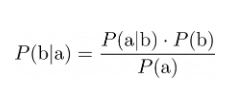

In [3]:
display(Image(filename="/data/skema/images/bayes-rule-white-bg.png"))

In [4]:
files = {
  "data": open("/data/skema/images/bayes-rule-white-bg.png", "rb"),
}
r = requests.post("{}/image/mml".format(SKEMA_EQ2MML_SERVICE), files=files)
print(r.text)

<math> <mrow> <mn> <mtr> <mtd> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mrow> <mo> | </mo> </mrow> <mi> a </mi> <mo> ) </mo> </mrow> </msub> <mo> = </mo> <mrow> <mfrac> <mrow> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> a </mi> </mrow> <mrow> <mo> | </mo> </mrow> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msub> <mo> &#x22C5 </mo> <msub> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msub> </mrow> <mrow> <msubsup> <mi> P </mi> <mrow> <mo> ( </mo> <mrow> <mi> a </mi> </mrow> <mo> ) </mo> </mrow> <mrow> <mo> ( </mo> <mrow> <mi> b </mi> </mrow> <mo> ) </mo> </mrow> </msubsup> </mrow> </mfrac> </mrow> </math>


# Code $\rightarrow$ function network

The Code2FN service take code as input (in multiple different forms), runs the program analysis pipeline to parse the files into CAST and translate the CAST into a Function Network (FN) and returns Gromet Function Network Module Collection (`GrometFNModuleCollection`) JSON.

The service currently accepts Python and Fortran (family) source code. The language type is determined by the filename extensions:
- Python: `.py`
- Fortran: `.f`, `.for`, `.f95`

The service can accept the following four types of code forms:
- string containing code
- single file
- multi-file - array of text-blobs and corresponding filenames
- zip archive containing a directory tree of source code files

## 1+ files (Python) $\rightarrow$ function network

In [5]:
filename = "exp1.py"
with open(Path("/data") / "skema" / "code" / filename, "r") as infile:
    contents = infile.read()

# display file contents
display(HTML('<code>{}</code>'.format(contents)))

# API call and response
system = {
  "files": [filename],
  "blobs": [contents],
}
response = requests.post("{}/fn-given-filepaths".format(SKEMA_PA_SERVICE), json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1",
      "fn": {
        "b": [
          {
            "function_type": "MODULE",
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "bf": [
          {
            "function_type": "FUNCTION",
            "body": 1,
            "gromet_type": "GrometBoxFunction",
            "name": "%lambda0_id0",
            "metadata": 7
          },
          {
            "function_type": "FUNCTION",
            "body": 2,
            "gromet_type": "GrometBoxFunction",
            "name": "greet_id2",
            "metadata": 9
          }
        ],
        "pof": [
          {
            "id": 1,
            "name": "greet",
            "box": 1,
            "gromet_type": "GrometPort",
            "metadata": 8
          }
        ],
        "gromet_type

## 1+ files (Fortran) $\rightarrow$ function network

In [6]:
filename = "exp1.f95"
with open(Path("/data") / "skema" / "code" / filename, "r") as infile:
    contents = infile.read()

# display file contents
display(HTML('<code>{}</code>'.format(contents)))

# API call and response
system = {
  "files": [filename],
  "blobs": [contents],
}
response = requests.post("{}/fn-given-filepaths".format(SKEMA_PA_SERVICE), json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1.f95",
      "fn": {
        "b": [
          {
            "function_type": "MODULE",
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "bf": [
          {
            "function_type": "EXPRESSION",
            "body": 1,
            "gromet_type": "GrometBoxFunction",
            "metadata": 5
          }
        ],
        "pof": [
          {
            "id": 1,
            "name": "x",
            "box": 1,
            "gromet_type": "GrometPort"
          }
        ],
        "gromet_type": "GrometFN"
      },
      "fn_array": [
        {
          "b": [
            {
              "function_type": "EXPRESSION",
              "gromet_type": "GrometBoxFunction"
            }
          ],
          "opo": [
            {
              "id":

## 1+ files (mixed languages) $\rightarrow$ function network

In [7]:
filenames = ["exp1.py", "exp1.f95"]
blobs = [open(Path("/data") / "skema" / "code" / filename, "r").read() for filename in filenames]

for blob in blobs:
    display(HTML('<code>{}</code>'.format(blob)))

# API call and response
system = {
  "files": filenames,
  "blobs": blobs,
}
response = requests.post("{}/fn-given-filepaths".format(SKEMA_PA_SERVICE), json=system)
pp(response.json())

{
  "schema": "FN",
  "schema_version": "0.1.7",
  "name": "",
  "modules": [
    {
      "schema": "FN",
      "schema_version": "0.1.7",
      "name": "exp1",
      "fn": {
        "b": [
          {
            "function_type": "MODULE",
            "gromet_type": "GrometBoxFunction",
            "name": "module",
            "metadata": 3
          }
        ],
        "bf": [
          {
            "function_type": "FUNCTION",
            "body": 1,
            "gromet_type": "GrometBoxFunction",
            "name": "%lambda0_id0",
            "metadata": 7
          },
          {
            "function_type": "FUNCTION",
            "body": 2,
            "gromet_type": "GrometBoxFunction",
            "name": "greet_id2",
            "metadata": 9
          }
        ],
        "pof": [
          {
            "id": 1,
            "name": "greet",
            "box": 1,
            "gromet_type": "GrometPort",
            "metadata": 8
          }
        ],
        "gromet_type

# Comment extraction

## 1 file (Python) $\rightarrow$ comments

In [8]:
filename = "CHIME_SIR.py"
with open(Path("/data") / "skema" / "code" / filename, "r") as infile:
    code = infile.read()

# display file contents
display(HTML('<code>{}</code>'.format(code)))

# API call and response

response = requests.post("{}/extract-comments".format(SKEMA_RS_SERVICE), json={"language" : "Python", "code" : code})
pp(response.json())

{
  "comments": [
    {
      "line_number": 1,
      "contents": "## ============================================================================="
    },
    {
      "line_number": 2,
      "contents": "## NOTATIONAL CONVENTIONS:"
    },
    {
      "line_number": 3,
      "contents": "##   Comments starting with single hash - '#' - are \"normal\" comments"
    },
    {
      "line_number": 4,
      "contents": "##   Comments starting with double hash - '##' - represent name corresopnding"
    },
    {
      "line_number": 5,
      "contents": "##       named component in hand-developed GroMEt representation"
    },
    {
      "line_number": 6,
      "contents": "##   Comments starting with triple_hash - '###' - represent comment about differences"
    },
    {
      "line_number": 7,
      "contents": "##       from original CHIME sir.py:"
    },
    {
      "line_number": 8,
      "contents": "##       https://github.com/CodeForPhilly/chime/blob/develop/src/penn_chime/model/sir.py